In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

trainset = torchvision.datasets.FashionMNIST('./data',
                                            download = True,
                                            train = True,
                                            transform = transform)

testset = torchvision.datasets.FashionMNIST('./data',
                                            download = True,
                                            train = False,
                                            transform = transform)



0it [00:00, ?it/s]

 99%|█████████▉| 26255360/26421880 [01:58<00:00, 825674.57it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz



0it [00:00, ?it/s]


 56%|█████▌    | 16384/29515 [00:01<00:00, 104904.34it/s]

0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz




  0%|          | 0/4422102 [00:00<?, ?it/s]

  0%|          | 16384/4422102 [00:00<00:39, 112394.90it/s]

  1%|          | 49152/4422102 [00:00<00:33, 131948.31it/s]

  2%|▏         | 81920/4422102 [00:00<00:28, 151337.11it/s]

  3%|▎         | 131072/4422102 [00:00<00:23, 181488.36it/s]

  5%|▌         | 229376/4422102 [00:01<00:17, 233884.39it/s]

  9%|▉         | 409600/4422102 [00:01<00:13, 297909.04it/s]

 19%|█▉        | 843776/4422102 [00:01<00:08, 407597.86it/s]

 22%|██▏       | 991232/4422102 [00:01<00:07, 449725.52it/s]

 29%|██▊       | 1269760/4422102 [00:01<00:05, 600407.06it/s]

 33%|███▎      | 1466368/4422102 [00:01<00:04, 725427.19it/s]

 37%|███▋      | 1630208/4422102 [00:02<00:03, 866819.78it/s]

 40%|████      | 1785856/4422102 [00:02<00:02, 973217.15it/s]

 44%|████▍     | 1941504/4422102 [00:02<00:02, 1038964.55it/s]

 47%|████▋     | 2088960/4422102 [00:02<00:02, 1133134.77it/s]

 52%|█████▏    | 2285568/4422102 [00:02<00:01, 1213303.04it/s]

 55%|█████▌    |

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz




  0%|          | 0/5148 [00:00<?, ?it/s]

8192it [00:00, 17748.35it/s]            

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


26427392it [02:10, 825674.57it/s]                              
32768it [00:21, 104904.34it/s]                           

In [18]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

In [4]:
classes = ('T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal',
           'Shirt', 'Sneaker','Bag','Ankle Boot')

def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap = "Greys")
    else :
        plt.imshow(np.transpose(npimg,(1,2,0)))

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16 * 4 * 4 , 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
net = Net()

In [7]:
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

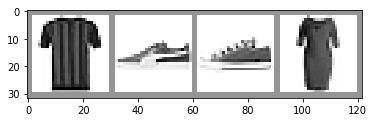

In [19]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

img_grid = torchvision.utils.make_grid(images)

matplotlib_imshow(img_grid, one_channel = True)

writer.add_image('four_fashion_mnist_images', img_grid)

In [20]:
tensorboard --logdir=runs

SyntaxError: can't assign to operator (<ipython-input-20-8dfe2aebc706>, line 1)